# 波士顿房价预测

## 导入所需库

In [2]:
import numpy as np 
import pandas as pd 
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
# 使输出的图像以更高清的方式显示
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
# plt.style.use('ggplot') 
plt.style.use("fivethirtyeight")
# Pandas中只显示3位小数
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

from sklearn import datasets  # 导入数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings

## 导入数据集

In [ ]:
boston = datasets.load_boston()
X = boston.data   # 特征值
y = boston.target  # 目标变量

df = pd.DataFrame(
    X,
    columns = boston.feature_names
)
#ImportError: `load_boston` has been removed from scikit-learn since version 1.2.
#原因是该数据集包含有争议的变量设计，涉及种族隔离与房价之间的假设，不符合现代伦理标准。


导入数据集

In [3]:
df = pd.read_csv('house_data.csv')

# 特征值（去掉目标列 'MEDV'）
X = df.drop(columns='MEDV')

# 目标变量
y = df['MEDV']




In [ ]:
df.head()

## 数据预处理

查看数据集字段、数据类型

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.info()

- CRIM：城镇人均犯罪率
- ZN： 占地面积超过2.5万平方英尺的住宅用地比例
- INDUS：城镇上非零售业务地区的 比例
- CHAS：虚拟变量；如果土地在查尔斯河，取值1；否则为0
- NOX：一氧化氮浓度
- RM：平均每个居民房数
- AGE：在1940年之前建成的所有者占用单位的比例
- DIS： 与波士顿的5个就业中心之间的加权距离
- RAD： 辐距离住房最近的公路入口编号
- TAX：每10,000美元的全额物业税
- PTRATIO：城镇师生比例大小
- B：1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例
- LSTAT：全部人口中地位较低人群的百分数大小
- MEDV：目标变量，以1000美元来进行计算的自由住房的中位数大小

数据形状和缺失值

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

统计信息

In [ ]:
df.describe()

相关性检验

In [4]:
#计算相关性系数
corr = df.corr()

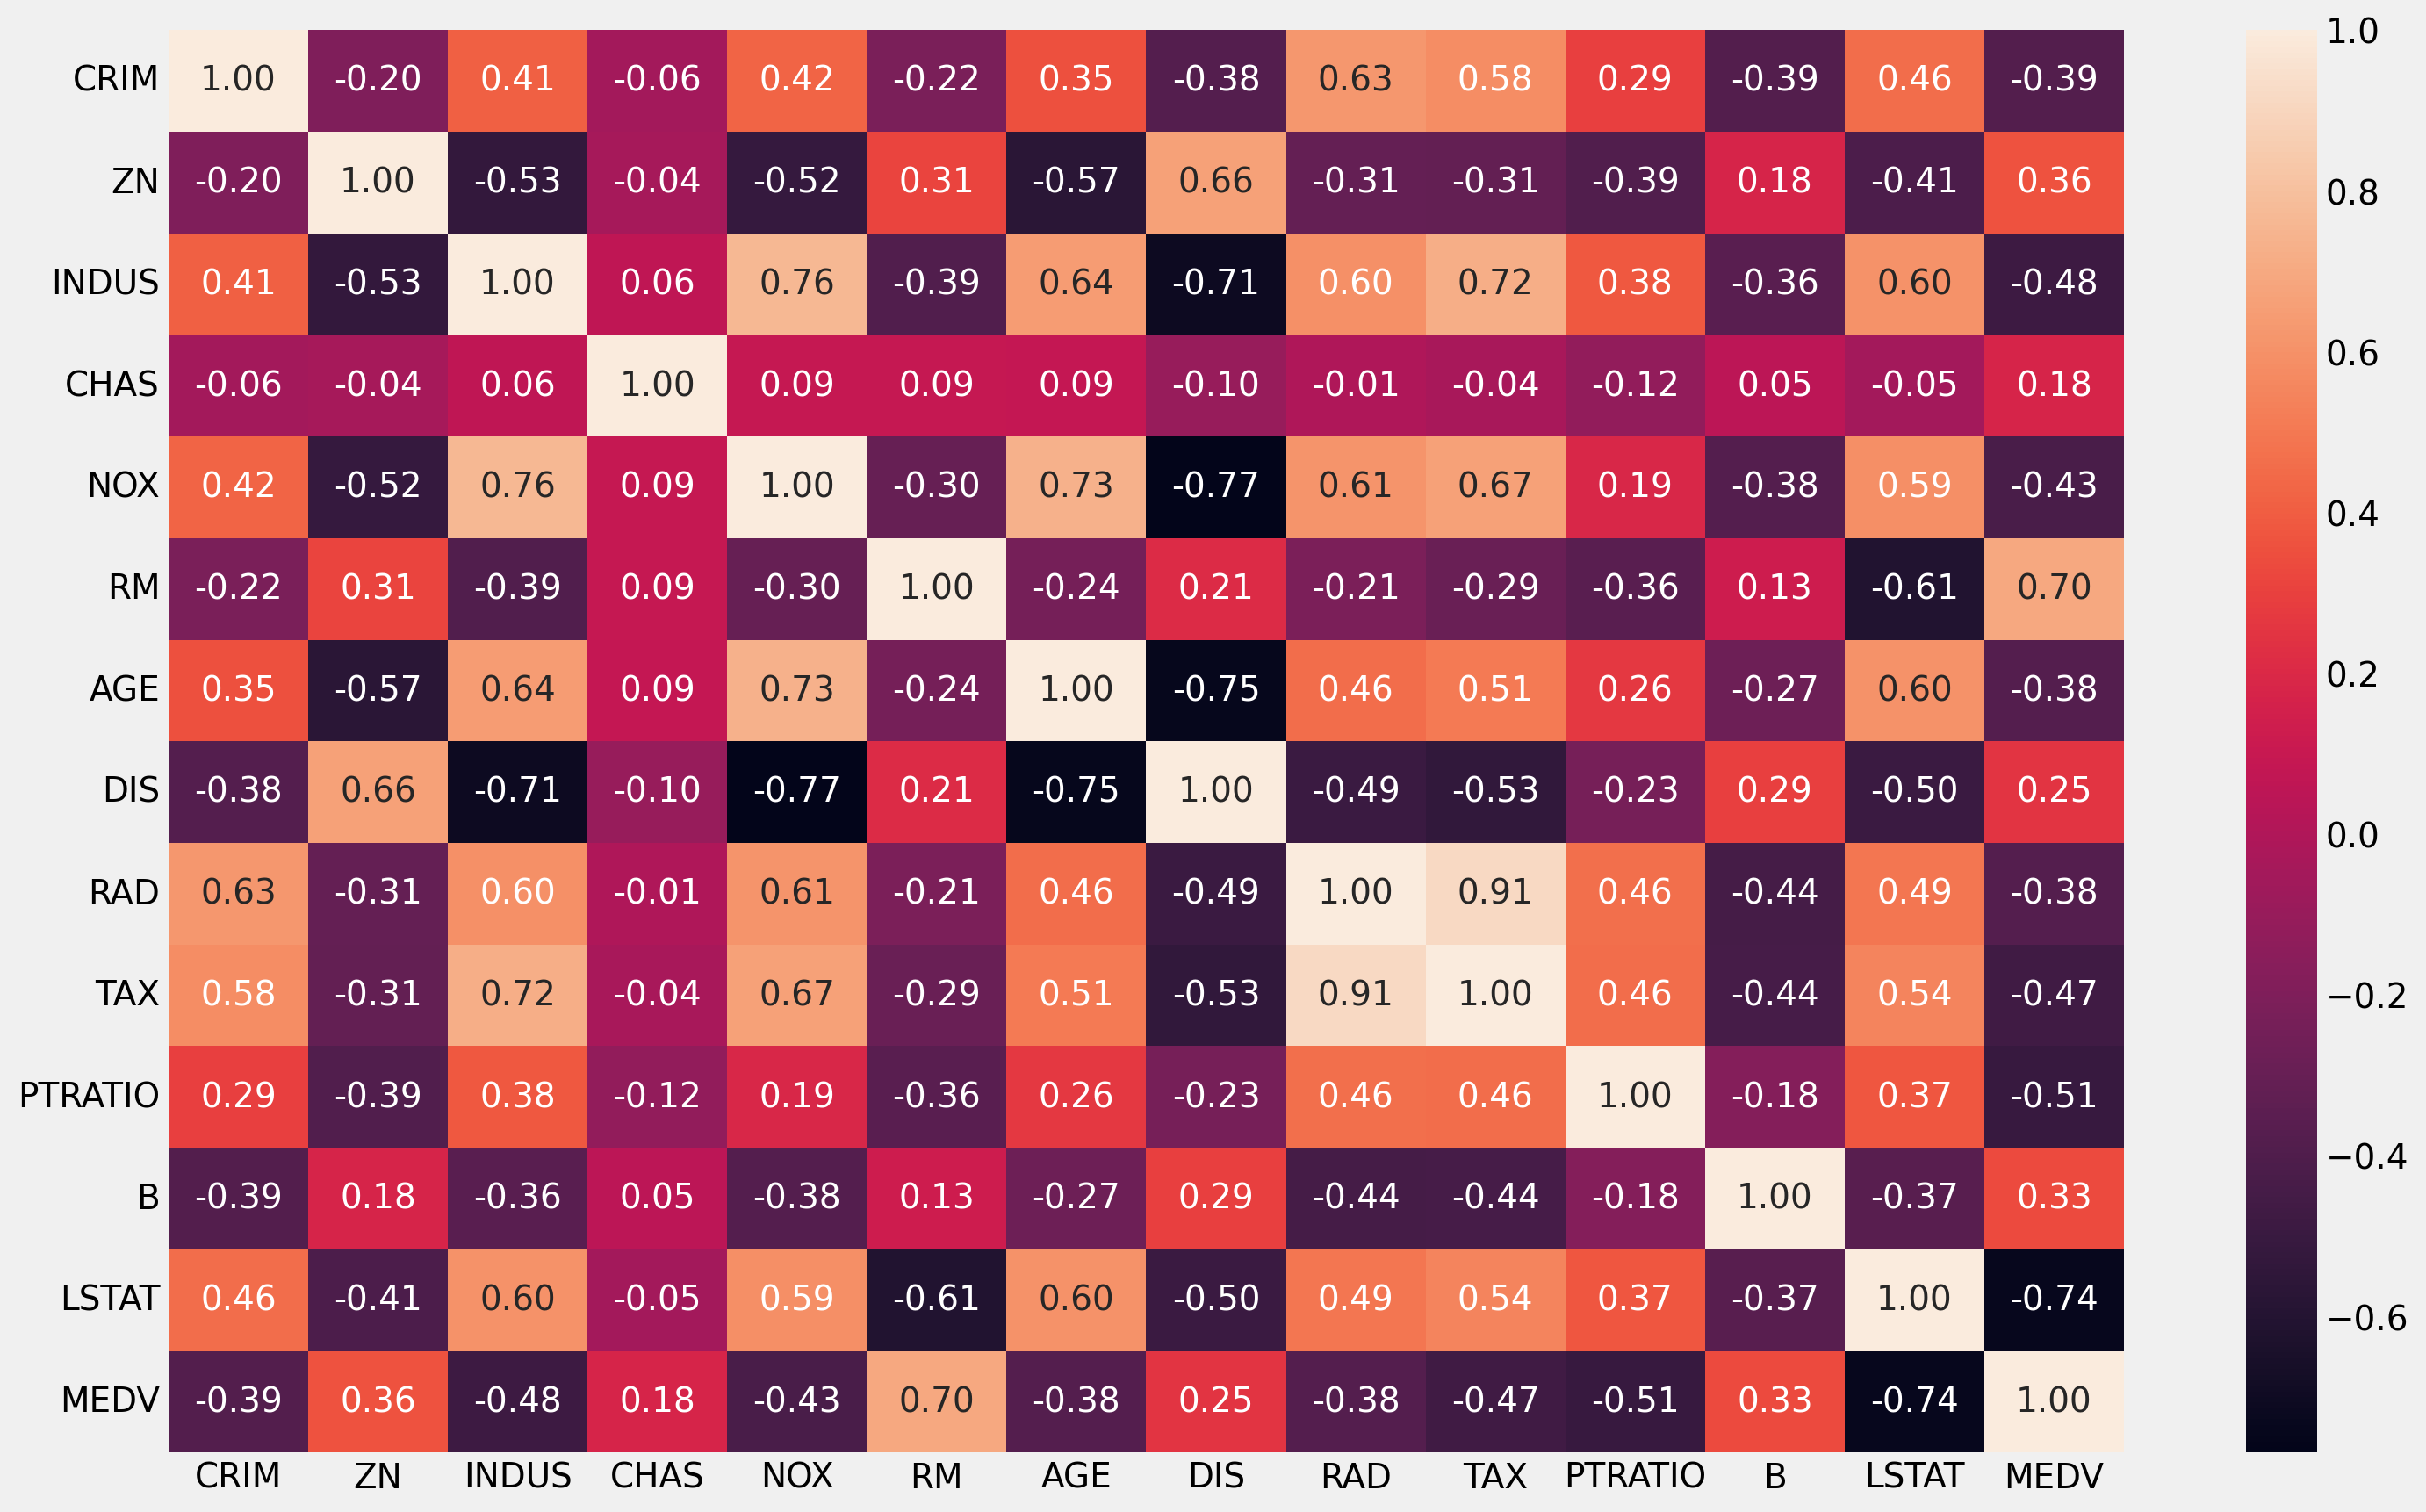

In [7]:
plt.figure(figsize=(16,10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    #cmap="YlGn"
)
plt.show()

In [8]:
#查看每个特征和目标变量MEDV之间的相关系数
corr["MEDV"].sort_values()

LSTAT     -0.738
PTRATIO   -0.508
INDUS     -0.484
TAX       -0.469
NOX       -0.427
CRIM      -0.388
RAD       -0.382
AGE       -0.377
CHAS       0.175
DIS        0.250
B          0.333
ZN         0.360
RM         0.695
MEDV       1.000
Name: MEDV, dtype: float64

多变量研究

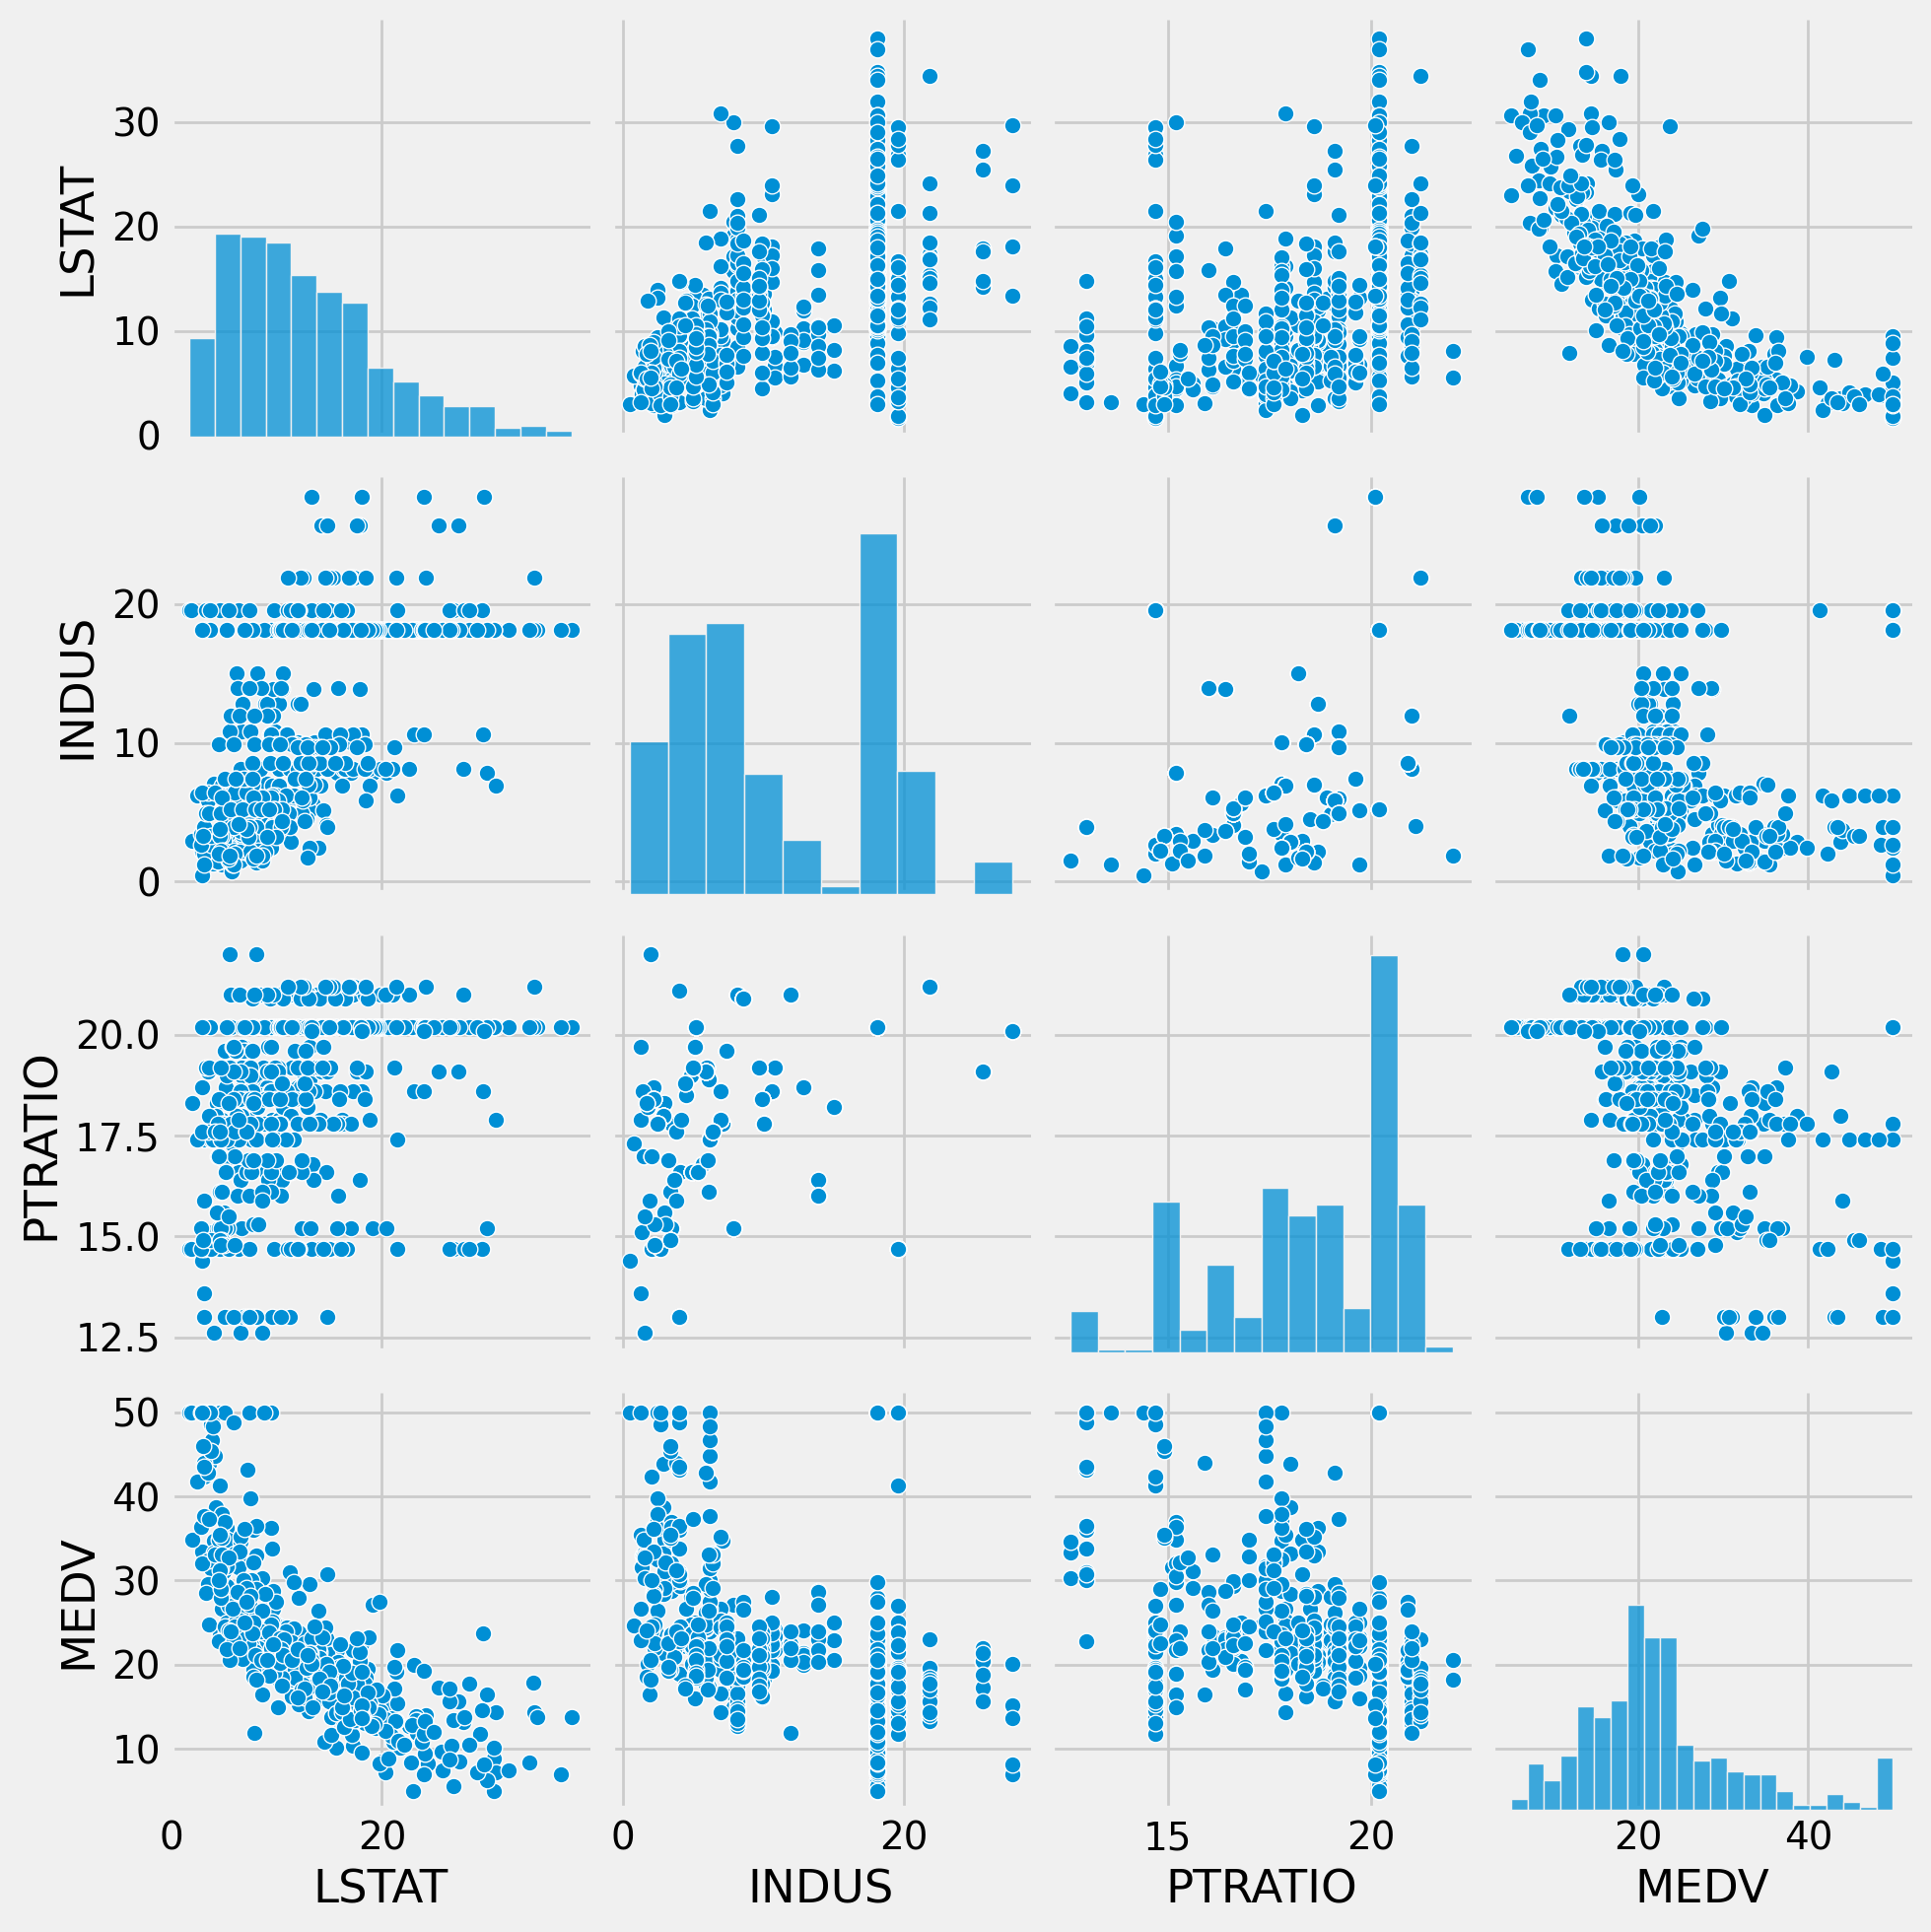

In [9]:
#研究不同自变量之间、自变量和因变量之间的关系
sns.pairplot(df[["LSTAT","INDUS","PTRATIO","MEDV"]]) # 绝对值靠前3的特征
plt.show()

数据集划分

In [ ]:
#划分给定的数据集，比例是8：2
X = df.drop("MEDV",axis=1)
y = df[["MEDV"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=123)

## 数据分析

### 线性回归模型

建模

In [11]:
from sklearn.linear_model import LinearRegression
# 模型实例化
le = LinearRegression()
# 拟合过程
le.fit(X_train, y_train)
# 得到回归系数
coef1 = le.coef_  # 13个回归系数

In [12]:
coef1

array([[-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,
         1.26954150e+00, -1.54697747e+01,  4.31968412e+00,
        -9.80167937e-04, -1.36597953e+00,  2.84521838e-01,
        -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
        -5.43790245e-01]])

预测

In [13]:
predict1 = le.predict(X_test) 

In [14]:
predict1[:5]

array([[16.00330023],
       [27.79447431],
       [39.26769478],
       [18.32613556],
       [30.45487494]])

指标得分
主要是考察两个指标的得分：

- 在测试集上的得分score
- 测试数据和预测数据之间的RMSE得分

In [15]:
print("Score：", le.score(X_test, y_test))
print("RSME：", np.sqrt(mean_squared_error(y_test, predict1)))

Score： 0.6592466510354096
RSME： 5.309659665032172


In [16]:
le_df = pd.DataFrame()

le_df["name"] = X.columns.tolist()
le_df["coef"] = coef1.reshape(-1,1)

In [17]:
le_df

,name,coef
0,CRIM,-0.099
1,ZN,0.048
2,INDUS,0.067
3,CHAS,1.270
4,NOX,-15.470
5,RM,4.320
6,AGE,-0.001
7,DIS,-1.366
8,RAD,0.285
9,TAX,-0.013


In [18]:
#真实值和预测值的对比
test_pre = pd.DataFrame({"test": y_test["MEDV"].tolist(),
                        "pre": predict1.flatten()
                        })

In [19]:
test_pre

,test,pre
0,15.000,16.003
1,26.600,27.794
2,45.400,39.268
3,20.800,18.326
4,34.900,30.455
...,...,...
97,31.500,31.251
98,23.300,26.610
99,33.300,36.456
100,17.500,16.524


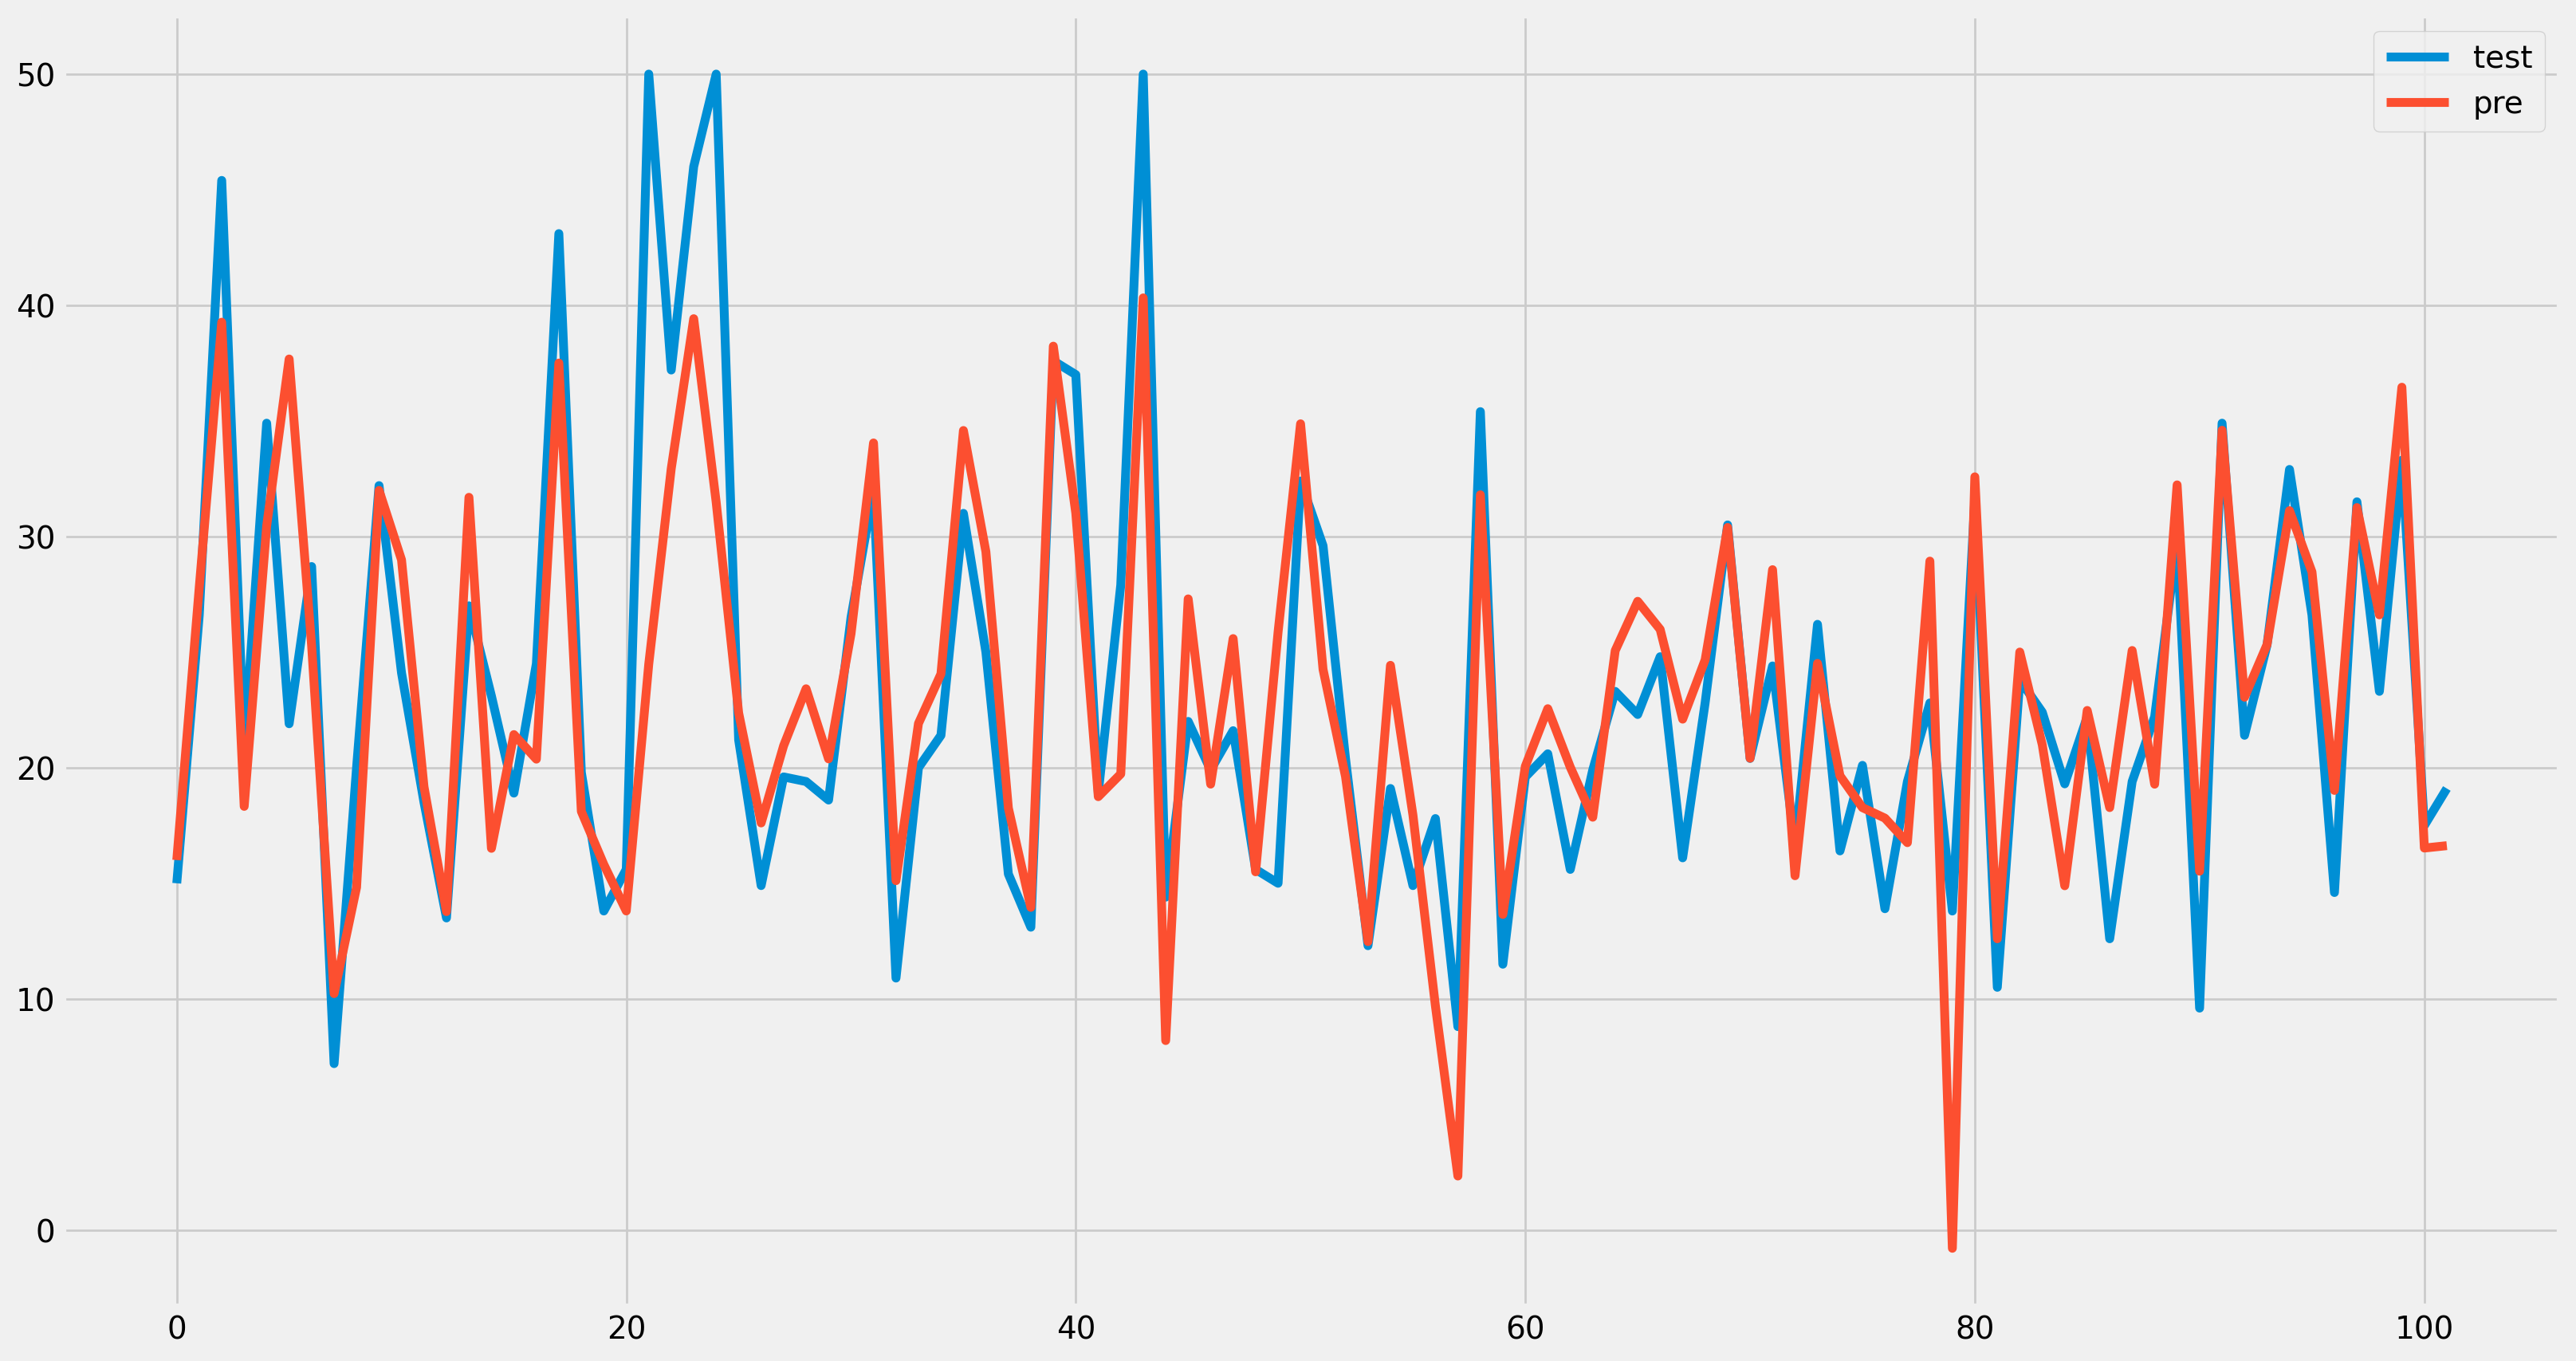

In [20]:
test_pre.plot(figsize=(18,10))
plt.show()

In [21]:
#对真实值和预测值对比
len(test_pre.query("test > pre"))/len(test_pre)

0.4215686274509804

结论1
通过上面的结果我们发现：

- 超过半数的预测值是比真实值要大的，预测的房价偏高
- 波士顿房价的数据比较干净，预处理和特征工程部分的工作相对会少一些，上面的建模过程几乎没有涉及到太多特征工程的工作

模型评价

1.测试集上评价:

将真实值和预测值的散点分布图画在坐标轴上

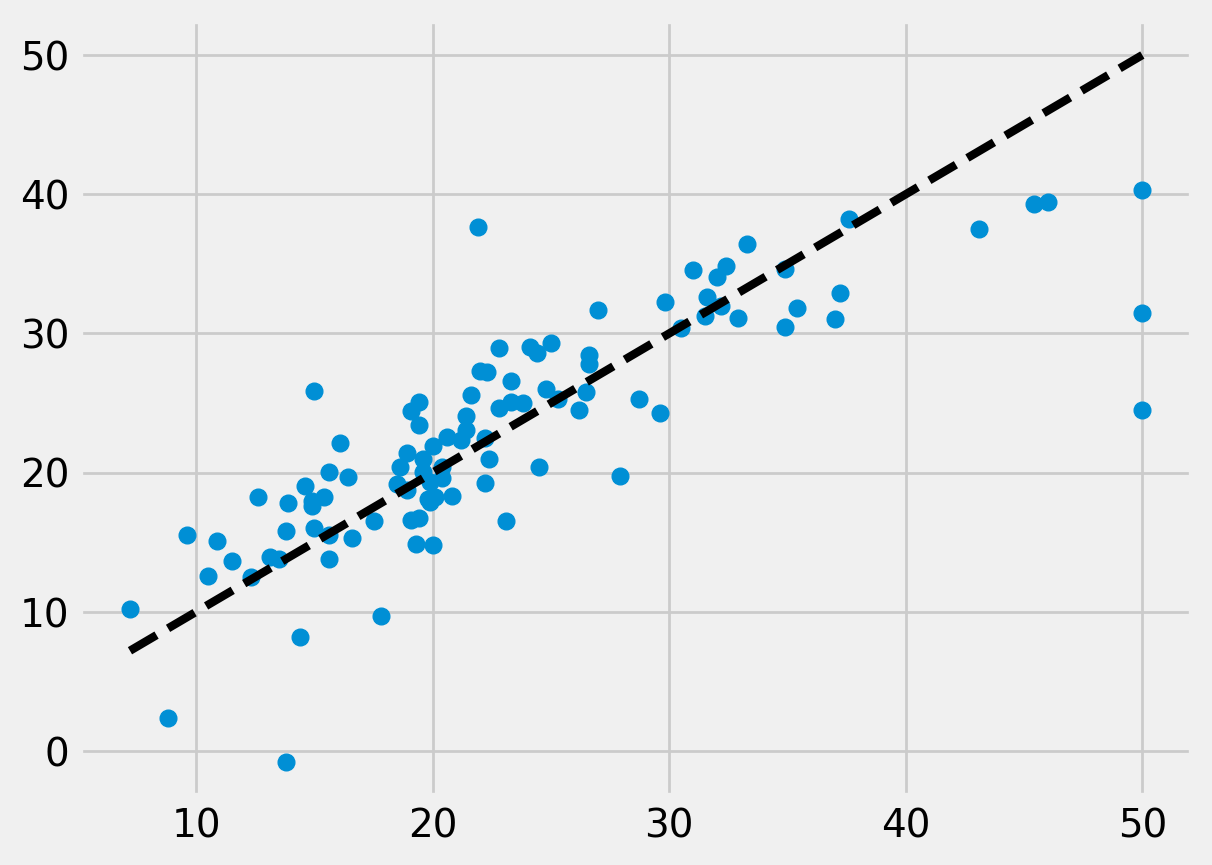

In [22]:
plt.scatter(y_test, predict1, label="test")
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--',
        lw=3,
        label="predict"
        )

plt.show()

从上图中看到：

- 在10-30之间的房价预测的更为准确些
- 当超过30后，预测的结果会偏小；上面的统计结果页表明，预测值会大于真实值

整体数据集评价

我们对整个数据集X上进行建模：

In [23]:
predict_all = le.predict(X)

print("Score：", le.score(X, y))  # 统一换成整体数据集
print("RSME：", np.sqrt(mean_squared_error(y, predict_all)))

Score： 0.7371217459477342
RSME： 4.710845521793303


In [24]:
#比较整体数据集上的真实值和预测值：
all_pre = pd.DataFrame({"test": y["MEDV"].tolist(),
                        "pre": predict_all.flatten()
                        })

In [25]:
all_pre

,test,pre
0,24.000,29.966
1,21.600,25.045
2,34.700,31.112
3,33.400,28.989
4,36.200,28.337
...,...,...
501,22.400,23.983
502,20.600,22.552
503,23.900,28.268
504,22.000,26.695


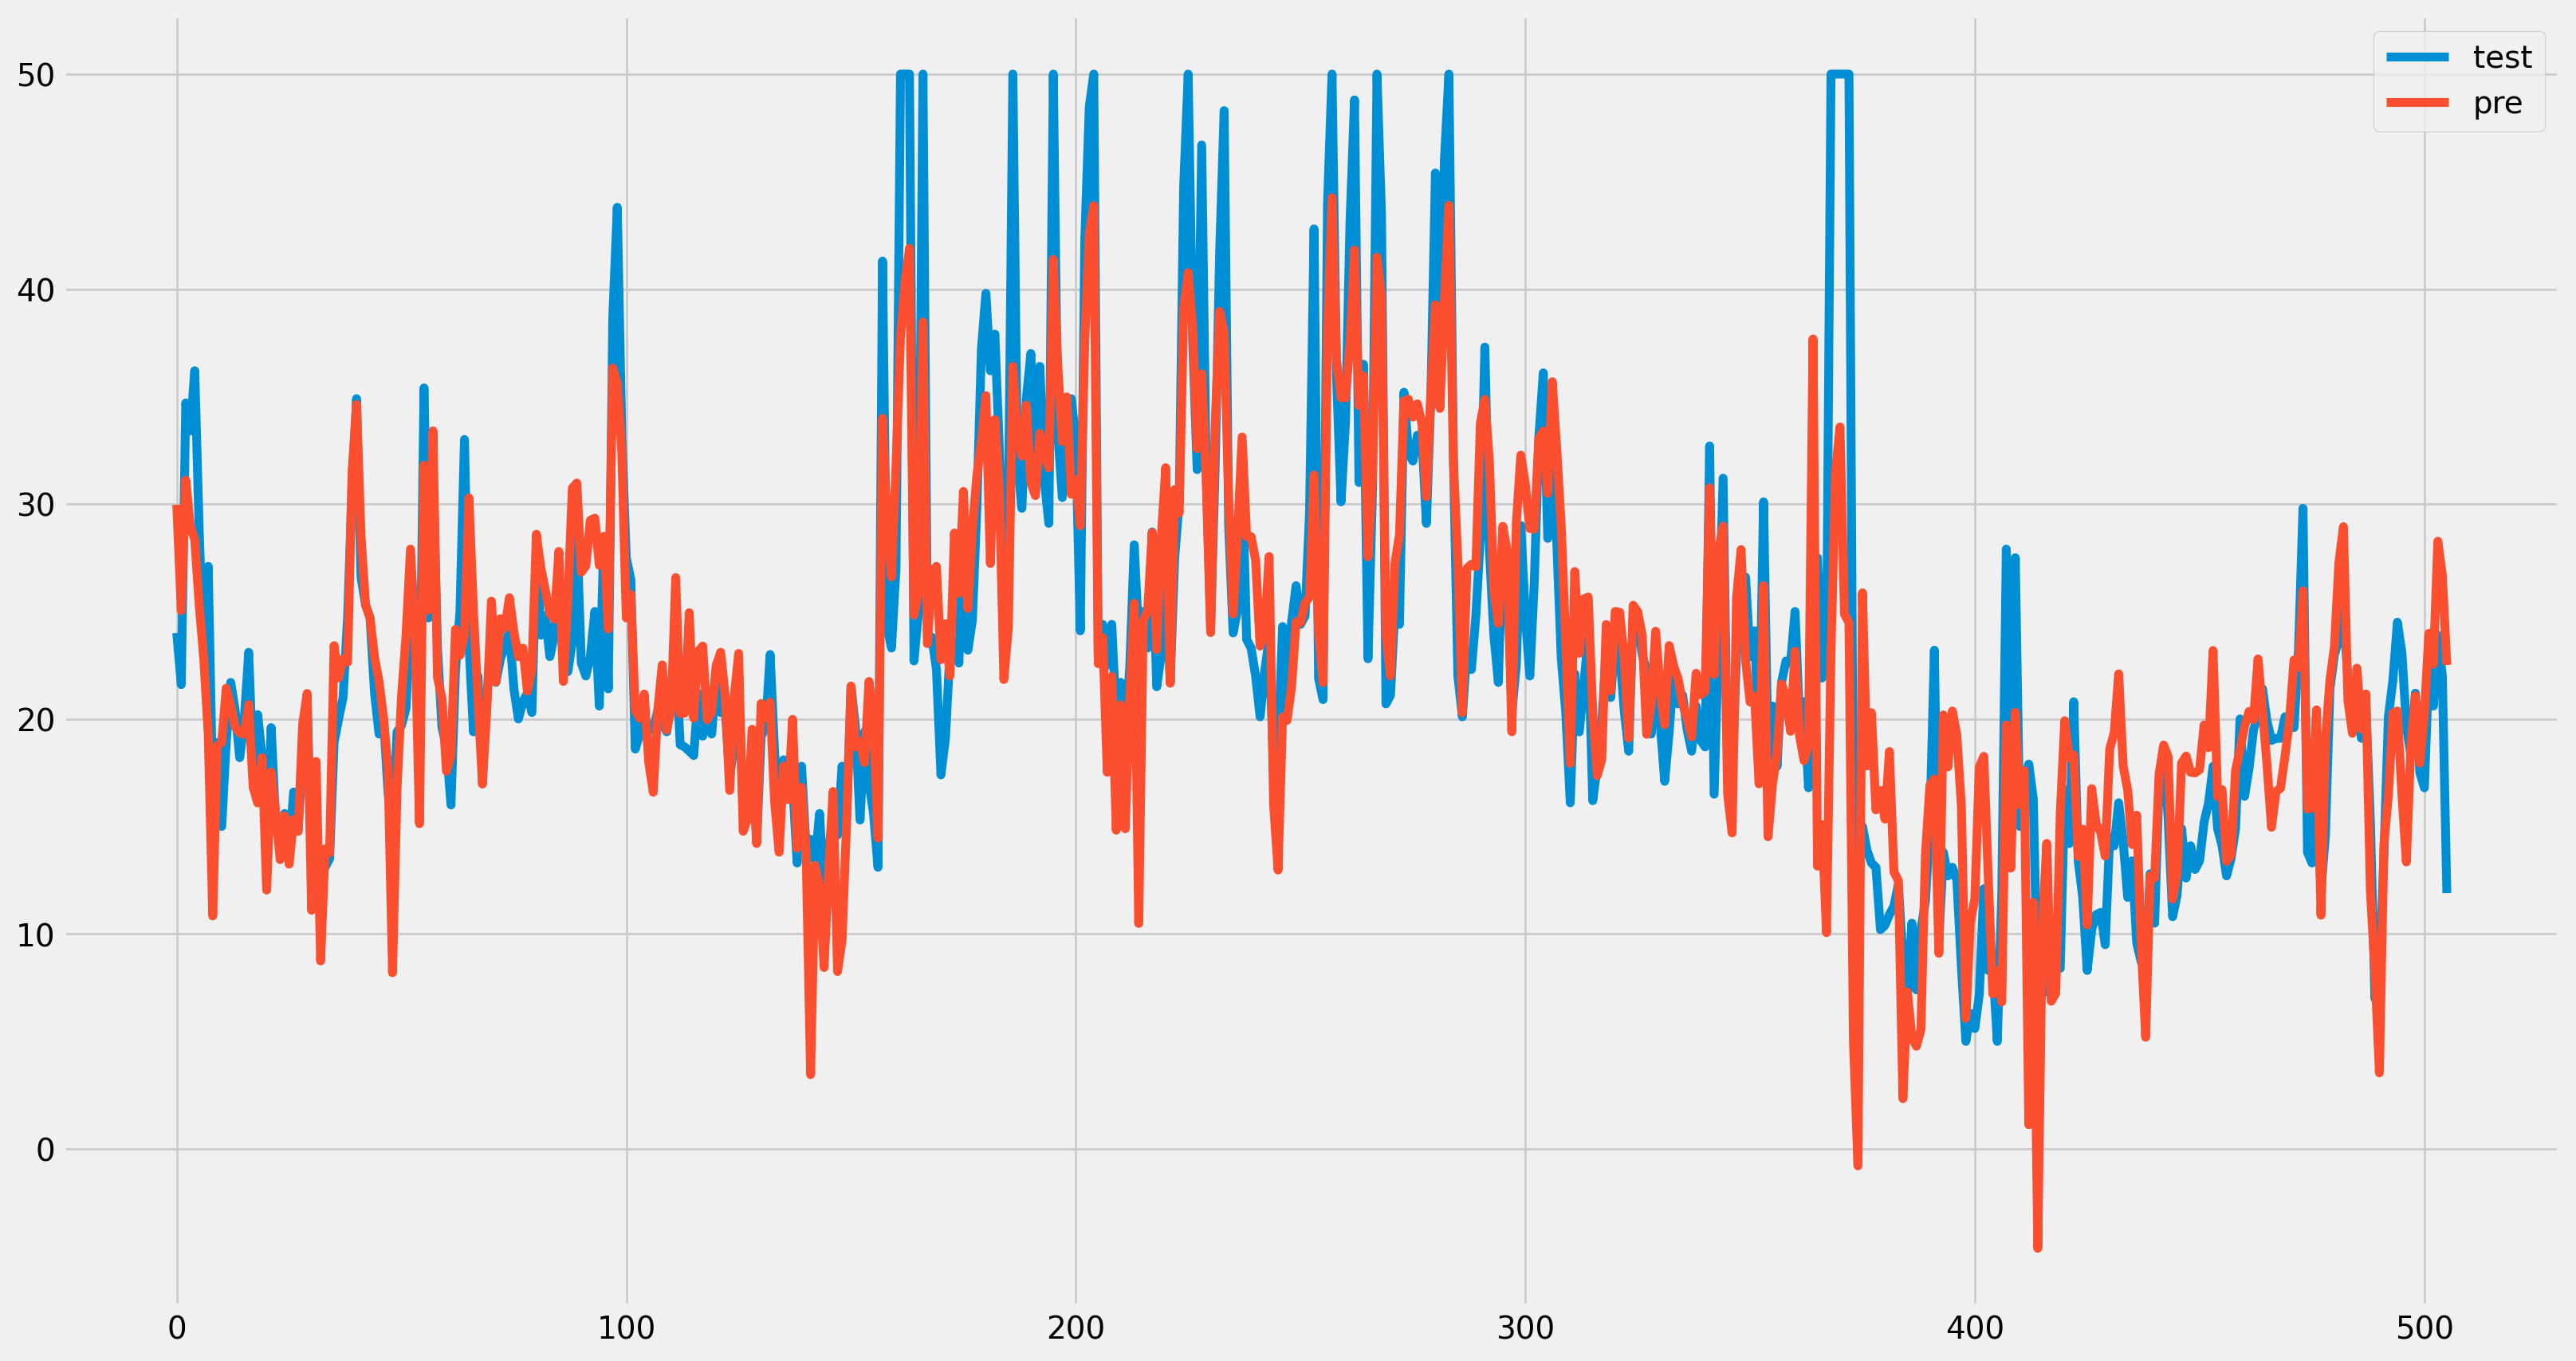

In [26]:
all_pre.plot(figsize=(18,10))
plt.show()

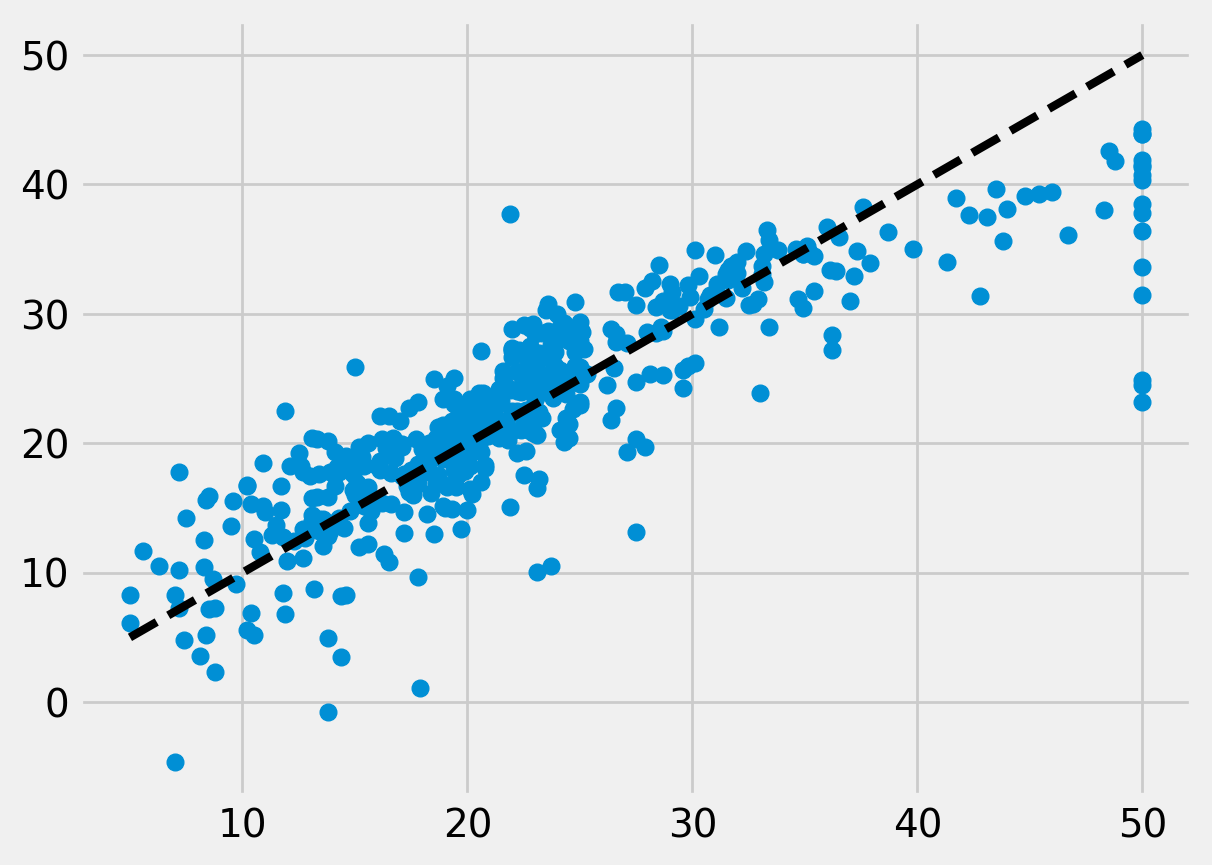

In [27]:
plt.scatter(y, predict_all, label="y_all")
plt.plot([y.min(), y.max()],
        [y.min(), y.max()],
        'k--',
        lw=3,
        label="all_predict"
        )

plt.show()

## 模型改进（使用其他算法）

数据标准化

为什么要标准化？

在原始数据中，不同特征的取值范围可能差异很大

如果不做标准化，某些取值大的特征可能会在模型中占主导地位，影响训练效果，尤其是对距离敏感的模型（如 KNN、SVM、线性回归）。


In [28]:
from sklearn.preprocessing import StandardScaler
# 实例化
ss = StandardScaler()
# 特征数据
X = ss.fit_transform(X)
# 目标变量
y = ss.fit_transform(y)
# 先切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

### 决策树回归

In [29]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor(max_depth=2) 

tr.fit(X_train, y_train) 
# 预测值 
tr_pre = tr.predict(X_test)

In [30]:
# 模型评分 
print('Score:{:.4f}'.format(tr.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,tr_pre))))

Score:0.7184
RMSE:0.5810


### GradientBoosting（梯度提升）

In [35]:
from sklearn import ensemble

gb = ensemble.GradientBoostingRegressor()

y_train_arr = np.ravel(y_train)


gb.fit(X_train, y_train_arr)
gb_pre=gb.predict(X_test) 

In [36]:
# 模型评分 
print('Score:{:.4f}'.format(gb.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,gb_pre))))

Score:0.9024
RMSE:0.3421


### Lasso回归

Lasso的全称是：Least Absolute Shrinkage and Selection Operator

Lasso也是惩罚其回归系数的绝对值；另外一种方式岭回归，使用的是平方形式

In [37]:
from sklearn.linear_model import Lasso

lo = Lasso()

lo.fit(X_train, y_train)
lo_pre=lo.predict(X_test) 

In [38]:
# 模型评分 
print('Score:{:.4f}'.format(lo.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,lo_pre))))

Score:-0.0001
RMSE:1.0949


### SVR-支持向量回归

In [40]:
from sklearn.svm import SVR

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train_arr)
linear_svr_pre = linear_svr.predict(X_test)

In [41]:
# 模型评分 
print('Score:{:.4f}'.format(linear_svr.score(X_test, y_test)))
# RMSE(标准误差)
print('RMSE:{:.4f}'.format(np.sqrt(mean_squared_error(y_test,linear_svr_pre))))

Score:0.7200
RMSE:0.5793
